In [1]:
animal = '011'

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os

In [3]:
animal_folder = r'E:/anxiety_ephys/' + animal + '/'
experiment_names = os.listdir(animal_folder)[:-1]
experiment_name = experiment_names[0]
sub_folder = 'circus'
circus = animal_folder + sub_folder + '/'
folder = circus + 'dat_files_mod/' + experiment_name + '_0.GUI/'

stimes = 'spike_times.npy'
sclusters = 'spike_clusters.npy'
infofile = 'cluster_info.tsv'


In [4]:
info = pd.read_csv(folder+infofile, sep = '\t', index_col=0)
idx=np.array(info.index)
group=np.array(info.group)
indexer = np.zeros(idx.max()+1, dtype = np.int8)
n=1
for i in range(idx.size):
    if group[i] == 'good':
        indexer[idx[i]] = n
        n+=1

In [5]:
spiketimes = np.load(folder + stimes)
spiketimes = spiketimes*50//20000  #sampled at 50Hz
clusters = np.load(folder + sclusters)
data = np.zeros((int(indexer.max()+1), int(max(spiketimes)+1)), dtype=np.uint8)

In [6]:
for index, time in enumerate(spiketimes):
    data[indexer[clusters[index]],time] += 1

In [7]:
cluster_names = np.zeros(data.shape[0], dtype = np.uint8)
for i in range(1,cluster_names.size):
    cluster_names[i] =  np.where(indexer == i)[0]
#np.save(circus + 'cluster_names', cluster_names)

lw =0.4
fig = plt.figure(figsize = (30,1.5 * data.shape[0]))
gs = fig.add_gridspec(data.shape[0]-1, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i, ax in tqdm(enumerate(axs)):
    ax.plot(data[i+1, :data.shape[1]//16], label = str(i), linewidth = lw)
    ax.legend(loc = 'upper right')
#plt.ylim(-250, 250)


In [8]:
logbook_1 = np.load(circus + 'logbook.npy')

In [9]:
logbook_2 = np.zeros(len(experiment_names)+1)
logbook_2[1:] = logbook_1[:len(experiment_names)]

In [10]:
logbook_3 = np.zeros(len(experiment_names)+1, dtype=np.int64)
for i in range(logbook_3.size):
    logbook_3[i] = np.sum(logbook_2[0:i+1])
logbook_3 = logbook_3*50//20000

In [11]:
overall_mean = np.empty((data.shape[0], logbook_3.size-1))
for i in range(logbook_3.size-1):
    overall_mean[:, i] = np.mean(data[:,logbook_3[i]:logbook_3[i+1]], axis = 1)

c:\users\yaniklab\.conda\envs\circus\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


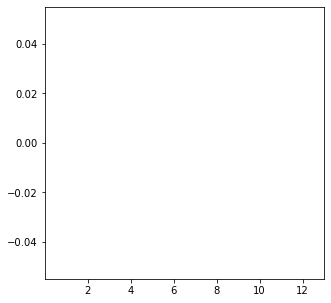

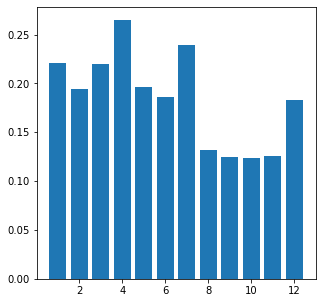

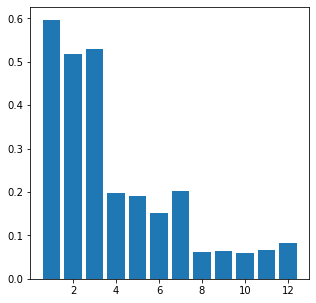

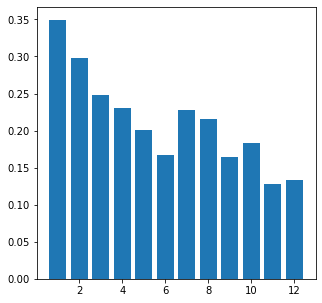

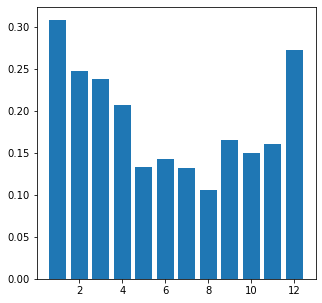

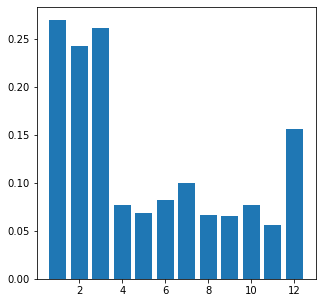

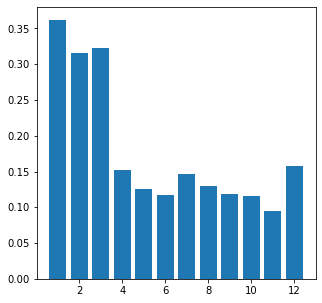

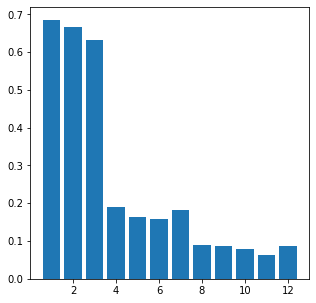

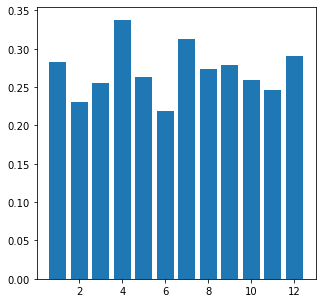

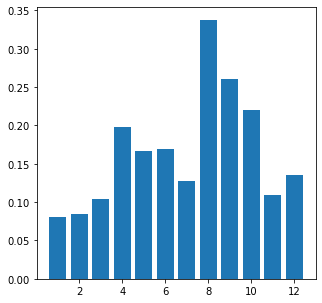

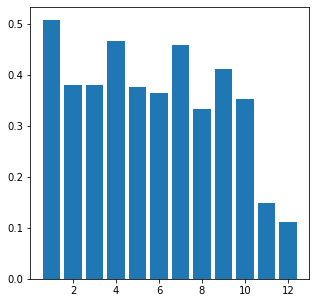

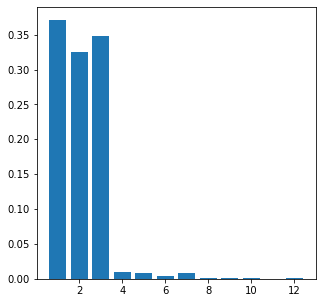

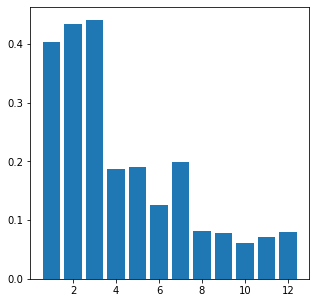

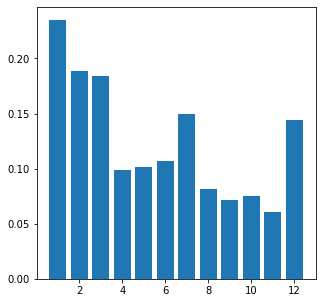

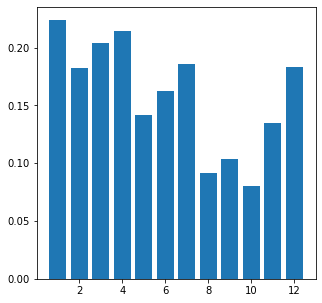

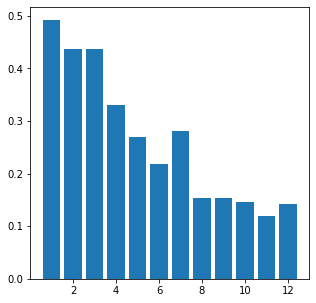

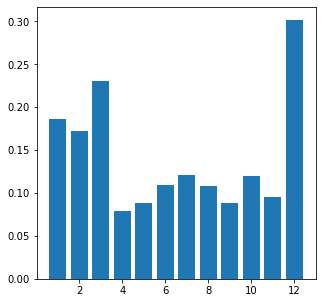

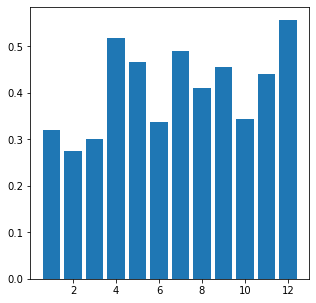

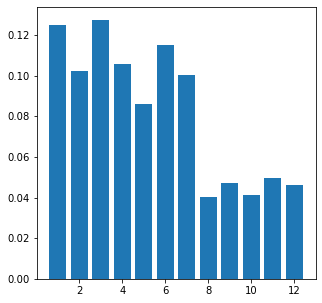

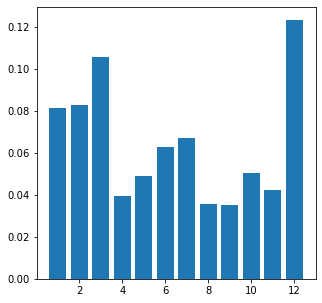

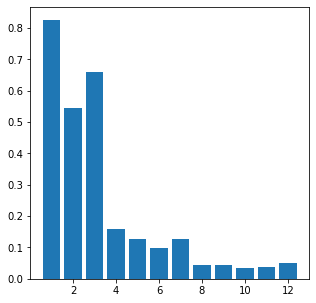

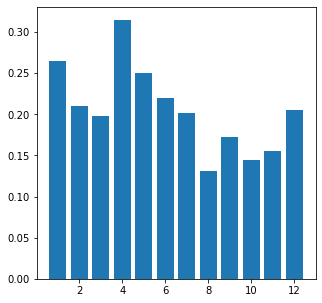

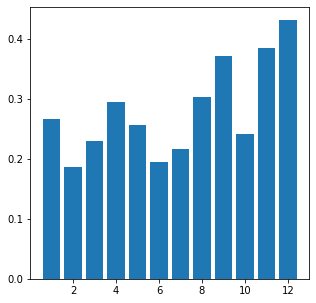

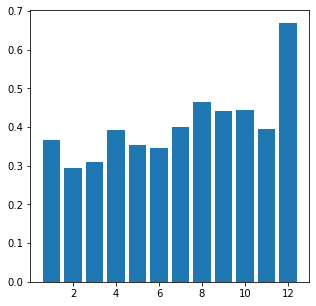

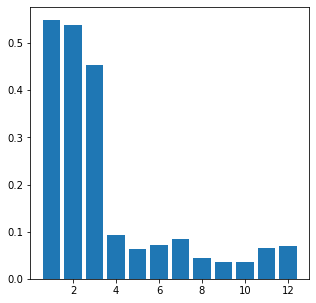

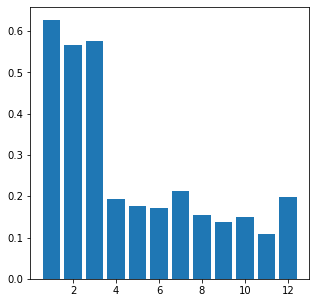

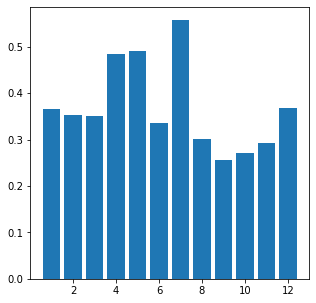

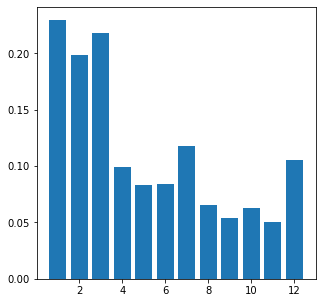

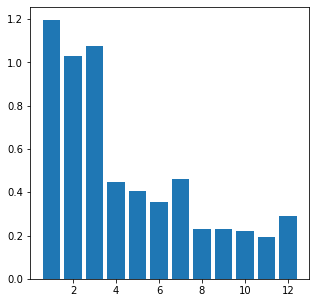

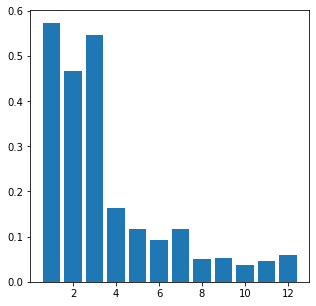

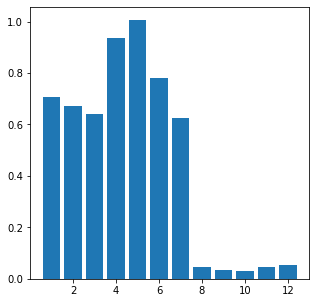

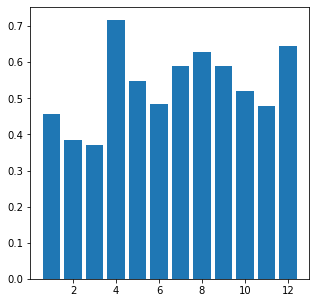

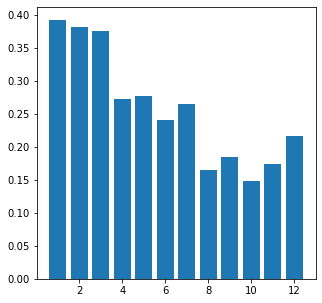

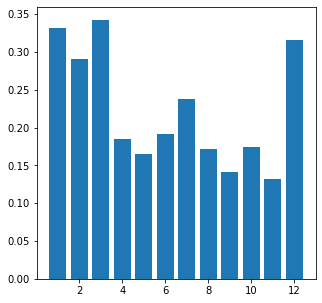

In [31]:
for i in range(overall_mean.shape[0]):
    fig = plt.figure(figsize=(5,5))
    plt.bar(np.arange(1, overall_mean.shape[1]+1), overall_mean[i])

In [24]:
temp = np.zeros((overall_mean.shape[0], 3))
temp[:, 0] = np.mean(overall_mean[:,:3], axis=1)
temp[:, 1] = np.mean(overall_mean[:,3:7], axis=1)
temp[:, 2] = np.mean(overall_mean[:,7:], axis=1)


c:\users\yaniklab\.conda\envs\circus\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


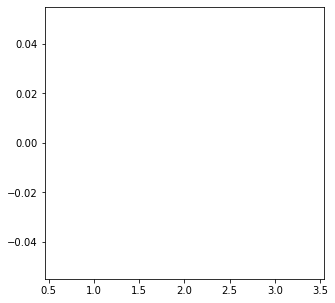

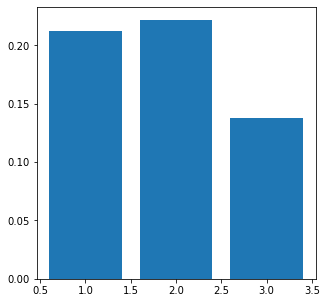

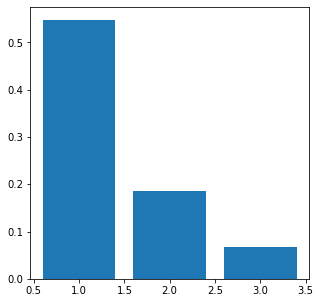

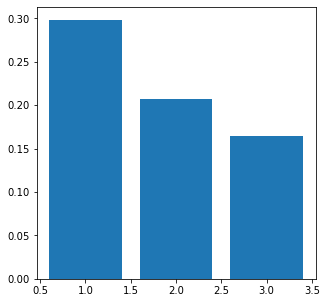

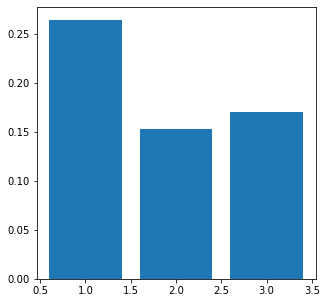

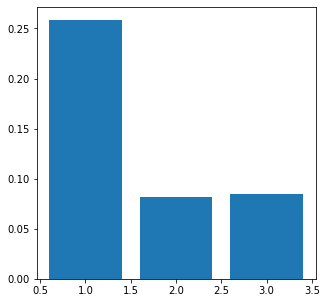

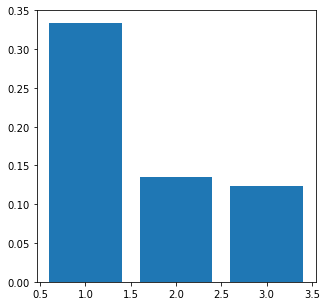

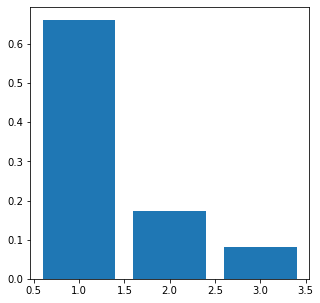

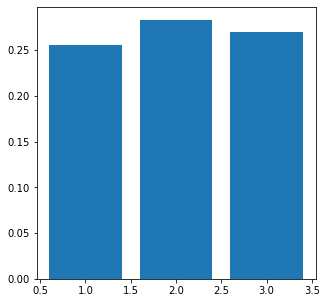

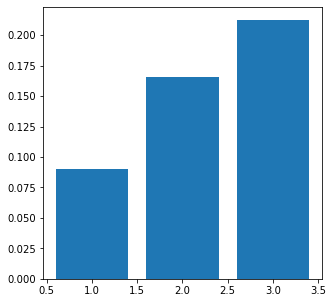

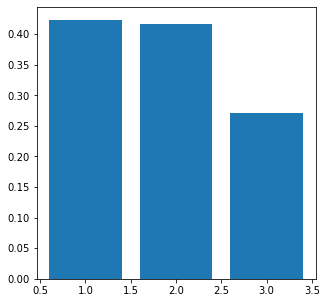

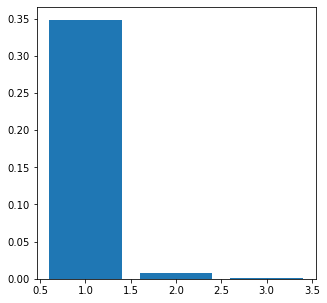

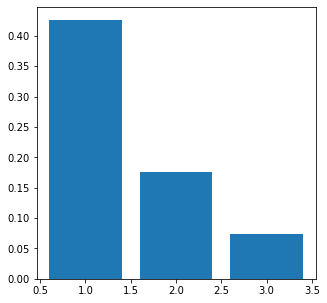

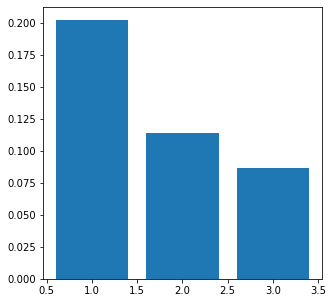

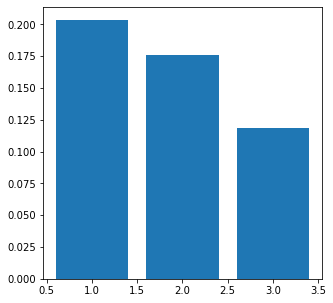

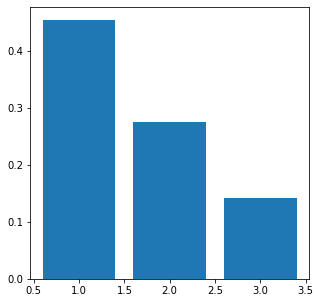

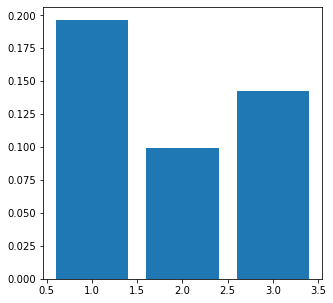

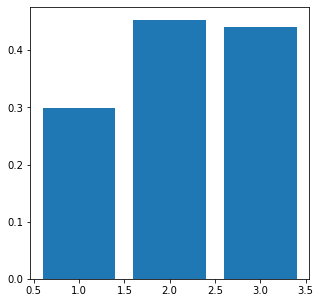

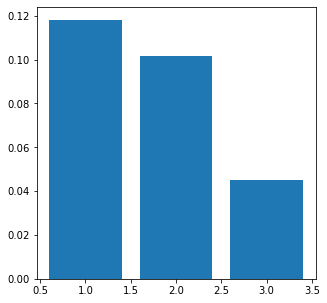

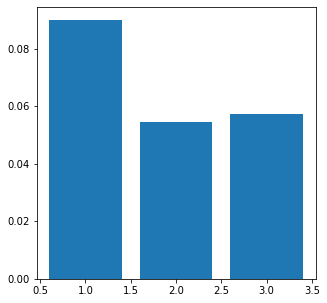

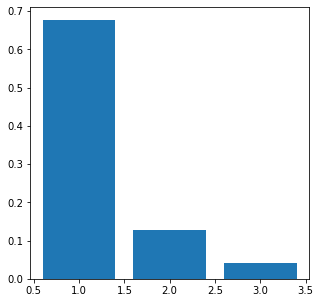

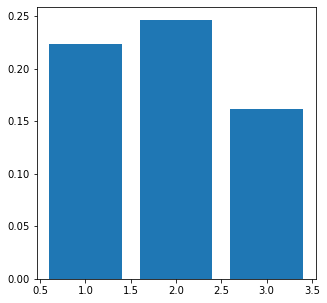

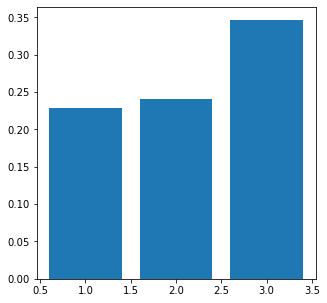

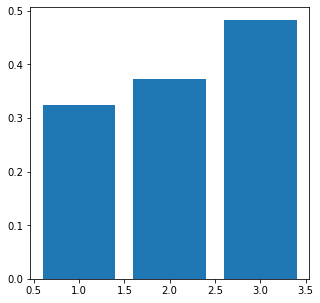

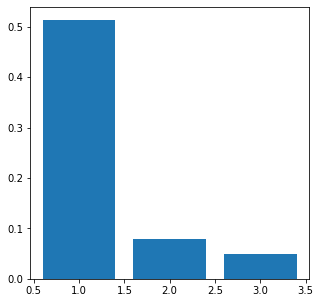

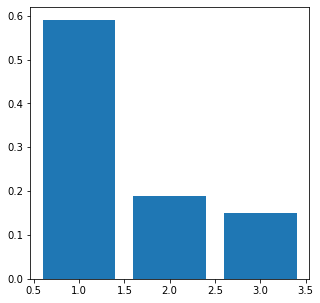

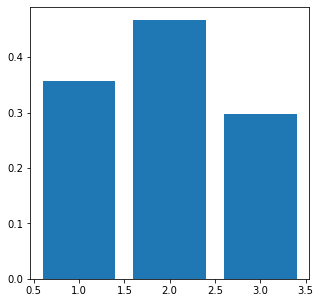

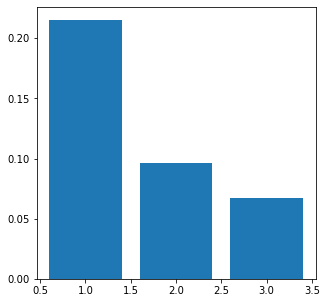

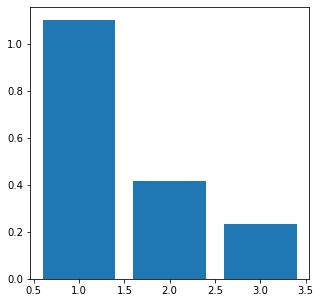

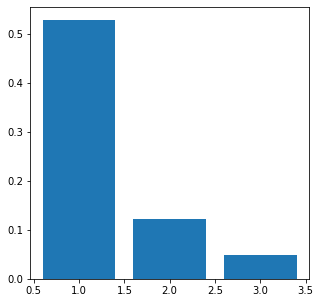

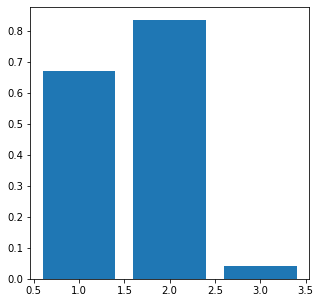

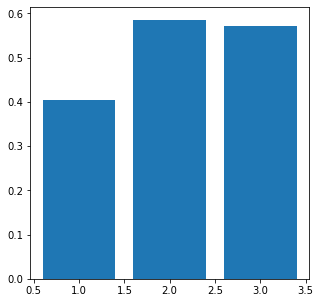

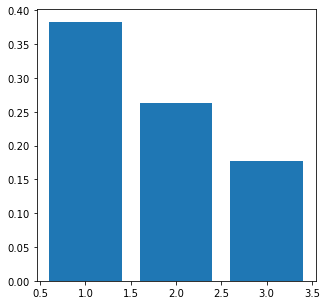

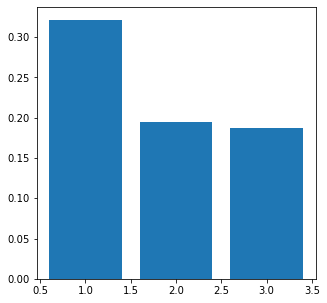

In [27]:
for i in range(temp.shape[0]):
    fig = plt.figure(figsize=(5,5))
    plt.bar([1,2,3], temp[i])

<BarContainer object of 3 artists>

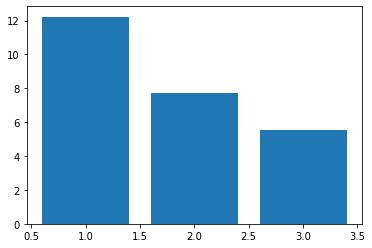

In [33]:
summ=np.sum(temp[1:], axis=0)
plt.bar([1,2,3], summ)